In [1]:
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

2023-09-20 21:16:40.785781: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-20 21:16:40.808248: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-20 21:16:40.989469: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-20 21:16:40.990400: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-20 21:16:41.912258: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df = pd.get_dummies(df)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [5]:
min_max = MinMaxScaler()

In [6]:
df[['bmi', 'charges']] = min_max.fit_transform(df[['bmi', 'charges']])
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0.321227,0,0.251611,1,0,0,1,0,0,0,1
1,18,0.479150,1,0.009636,0,1,1,0,0,0,1,0
2,28,0.458434,3,0.053115,0,1,1,0,0,0,1,0
3,33,0.181464,0,0.333010,0,1,1,0,0,1,0,0
4,32,0.347592,0,0.043816,0,1,1,0,0,1,0,0


In [7]:
from sklearn.model_selection import train_test_split
X = df.drop("charges", axis = 1)
y = df['charges']

In [8]:
(X_train , X_test,y_train, y_test )= train_test_split(X,y, test_size= 0.2, random_state= 42)

In [9]:
tensorX_train = tf.constant(X_train)
tensory_train = tf.constant(y_train)
tensorX_test = tf.constant(X_test)
tensory_test = tf.constant(y_test)


tensorX_train[0].shape

TensorShape([11])

In [10]:
tf.random.set_seed(42)


model = keras.Sequential([
    keras.layers.Dense(10, input_shape= ([11]))
])


model.compile(loss='mse', 
                optimizer=keras.optimizers.Adam(),
              metrics= ['mse'])


history = model.fit(tensorX_train, tensory_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 180.2411 - mse: 180.2411
Epoch 2/100
34/34 [==============================] - 0s 953us/step - loss: 146.0193 - mse: 146.0193
Epoch 3/100
34/34 [==============================] - 0s 917us/step - loss: 117.8903 - mse: 117.8903
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 94.7265 - mse: 94.7265
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 75.9044 - mse: 75.9044
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 60.2681 - mse: 60.2681
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 47.6208 - mse: 47.6208
Epoch 8/100
34/34 [==============================] - 0s 920us/step - loss: 37.2924 - mse: 37.2924
Epoch 9/100
34/34 [==============================] - 0s 930us/step - loss: 28.9443 - mse: 28.9443
Epoch 10/100
34/34 [==============================] - 0s 979us/step - loss: 22.2964 - mse: 22.2964
Epoch 11/100
34/34 [===

In [11]:
y_pred = model.predict(tensorX_test)

9/9 [==============================] - 0s 701us/step


In [12]:
y_pred.shape, tensory_test.shape

((268, 10), TensorShape([268]))

In [13]:
tensory_test = tf.reshape(tensory_test, (-1,1))
tensory_test.shape

TensorShape([268, 1])

In [14]:
model.evaluate(tensorX_test, tensory_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.0953 - mse: 0.0953


[0.09527069330215454, 0.09527069330215454]

Text(0.5, 0, 'epochs')

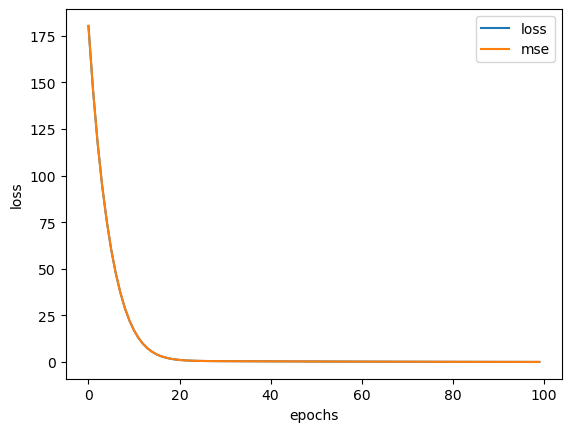

In [15]:
pd.DataFrame(history.history).plot()
plt.ylabel ("loss")
plt.xlabel("epochs")

In [16]:
y_pred.shape,(tensory_test.numpy()).shape

((268, 10), (268, 1))

In [46]:
y_test, y_pred

(764     0.127269
 887     0.066247
 890     0.450276
 1293    0.130570
 259     0.520817
           ...   
 109     0.733196
 575     0.177195
 535     0.078936
 543     1.000000
 846     0.139681
 Name: charges, Length: 268, dtype: float64,
 array([[ 0.06348523,  0.23576581, -0.03038725, ...,  0.16708821,
          0.14281458,  0.12867448],
        [ 0.31787035,  0.096295  ,  0.01216978, ...,  0.07830366,
          0.09309173,  0.07876705],
        [-0.27248138,  1.435736  ,  1.0074494 , ...,  0.6145037 ,
          0.58144593,  0.6027894 ],
        ...,
        [ 0.42306697, -0.16885987,  0.04609105, ...,  0.11238286,
          0.1111109 ,  0.09297742],
        [ 0.05556434,  1.1561611 ,  0.47296414, ...,  0.51050407,
          0.57595605,  0.64751077],
        [ 0.1250807 ,  0.15261078,  0.20903689, ...,  0.15490067,
          0.16685066,  0.1846997 ]], dtype=float32))

In [55]:
y_test.value_counts

<bound method IndexOpsMixin.value_counts of 764     0.127269
887     0.066247
890     0.450276
1293    0.130570
259     0.520817
          ...   
109     0.733196
575     0.177195
535     0.078936
543     1.000000
846     0.139681
Name: charges, Length: 268, dtype: float64>

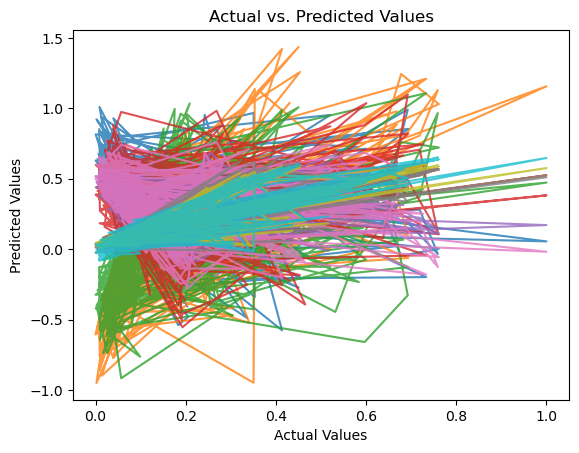

In [48]:
import matplotlib.pyplot as plt
plt.plot(y_test, y_pred,alpha = 0.8)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


In [60]:
y_pred[:,1]

array([ 2.3576581e-01,  9.6294999e-02,  1.4357359e+00,  2.4618948e-01,
       -8.3631277e-04, -5.0519043e-01, -3.7905085e-01,  6.8688929e-01,
       -2.8284070e-01,  3.3084774e-01, -1.8029630e-02,  8.8208854e-02,
       -8.8491455e-02,  8.0616701e-01,  1.1293762e+00,  8.1075013e-01,
        4.9431241e-01,  9.7829914e-01,  3.8253653e-01,  8.5296977e-01,
       -6.7785895e-01, -2.3881090e-01, -9.4895887e-01, -4.3859717e-01,
        5.4851758e-01,  4.4602621e-01,  3.8125759e-01, -8.8661611e-02,
        2.9194748e-01, -6.0521817e-01, -9.0367913e-02,  6.7992270e-01,
       -3.2951668e-01, -1.0397911e-02, -7.3335481e-01,  9.4793141e-03,
       -6.8363595e-01, -7.1448207e-02,  1.1229511e+00,  4.8216689e-01,
       -6.5192866e-01, -4.6023250e-01,  2.9212838e-01,  5.4219449e-01,
       -1.4319922e-01,  1.8122709e-01, -2.7516395e-01, -5.3055608e-01,
        7.1986902e-01, -1.9744052e-01,  8.3669817e-01, -5.8404613e-01,
        2.3427987e-01, -7.4632192e-01,  4.5135891e-01,  1.8763888e-01,
      

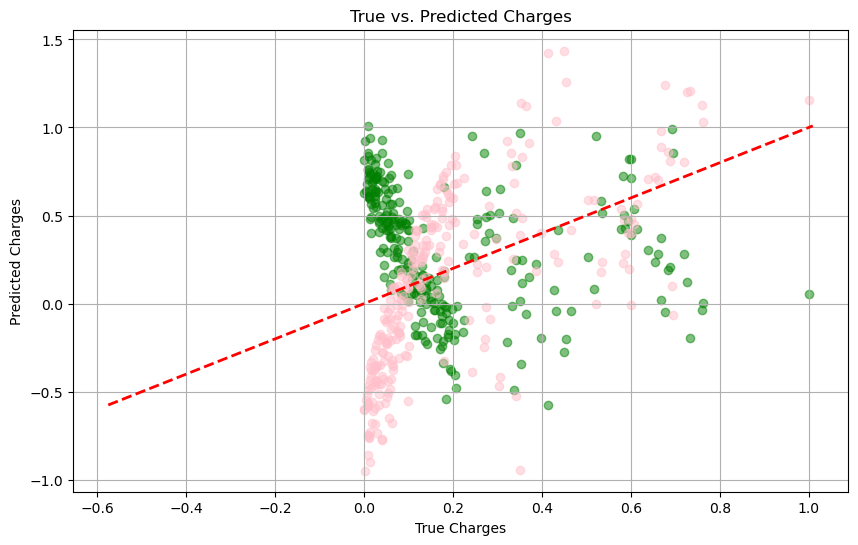

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the true labels and predicted labels
true_labels = y_test.values
predicted_labels = y_pred[:, 0]  # Assuming you want to plot the first column of y_pred

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test.values, y_pred[:,0], alpha=0.5, color = 'g')
plt.scatter(y_test.values, y_pred[:,1], alpha=0.5, color = 'pink')
plt.title('True vs. Predicted Charges')
plt.xlabel('True Charges')
plt.ylabel('Predicted Charges')y_pred

# Add a diagonal line for reference
max_val = max(true_labels.max(), predicted_labels.max())
min_val = min(true_labels.min(), predicted_labels.min())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red', linewidth=2)

plt.grid(True)
plt.show()
